## MGRSPandas key features

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:

[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgridpandas/10_mgrs.ipynb)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/master)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD)

### Install vgridpandas

In [1]:
# %pip install vgridpandas

### Latlong to MGRS

In [5]:
import pandas as pd
from vgridpandas import mgrspandas          
df = pd.read_csv('https://github.com/uber-web/kepler.gl-data/raw/master/nyctrips/data.csv')
df = df.head(100)
df = df.rename({'pickup_longitude': 'lon', 'pickup_latitude': 'lat'}, axis=1)[['lon', 'lat', 'passenger_count']]
resolution = 2
df = df.mgrs.latlon2mgrs(resolution)
df.head()

lon        lat  passenger_count  mgrs_res
mgrs                                                      
18TWL8411 -73.993896  40.750111                1         2
18TWL8610 -73.976425  40.739811                1         2
18TWL8711 -73.968704  40.754246                5         2
18TWL9513 -73.863060  40.769581                5         2
18TWL8814 -73.945541  40.779423                1         2

### MGRS to geo boundary

In [6]:
df = df.mgrs.mgrs2geo()
df.head()

lon        lat  passenger_count  mgrs_res  \
mgrs                                                         
18TWL8411 -73.993896  40.750111                1         2   
18TWL8610 -73.976425  40.739811                1         2   
18TWL8711 -73.968704  40.754246                5         2   
18TWL9513 -73.863060  40.769581                5         2   
18TWL8814 -73.945541  40.779423                1         2   

                                                    geometry  
mgrs                                                          
18TWL8411  POLYGON ((-74.00503 40.74566, -73.99305 40.745...  
18TWL8610  POLYGON ((-73.98148 40.73645, -73.9695 40.7364...  
18TWL8711  POLYGON ((-73.9695 40.74535, -73.95752 40.7453...  
18TWL9513  POLYGON ((-73.87445 40.76248, -73.86246 40.762...  
18TWL8814  POLYGON ((-73.95724 40.77227, -73.94524 40.772...

### MGRS point binning

<Axes: >

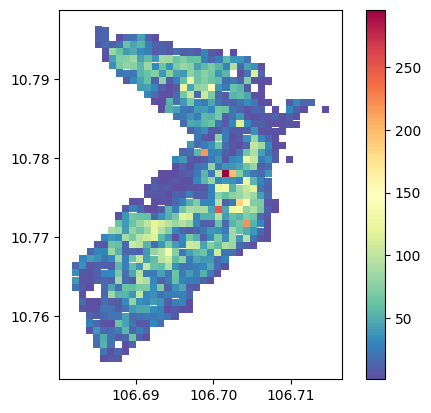

In [8]:
import geopandas as gpd
from vgridpandas import mgrspandas

# df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
resolution = 3
stats = "count"
df_bin = df.mgrs.mgrsbin(resolution=resolution, stats = stats, 
                                # numeric_column="confidence",
                                # category_column="category",
                                return_geometry=True)
df_bin.plot(        
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)